In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df["test_result"].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

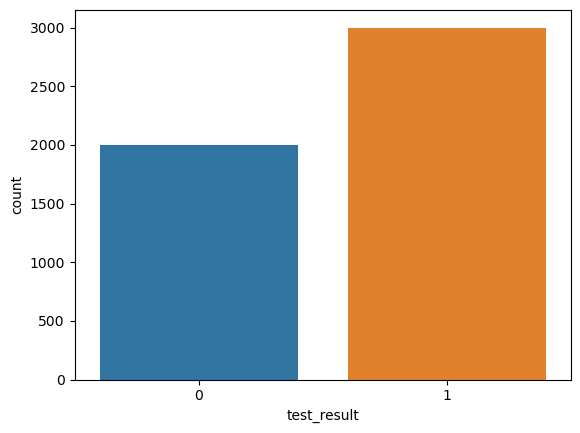

In [9]:
sns.countplot(data=df, x="test_result");

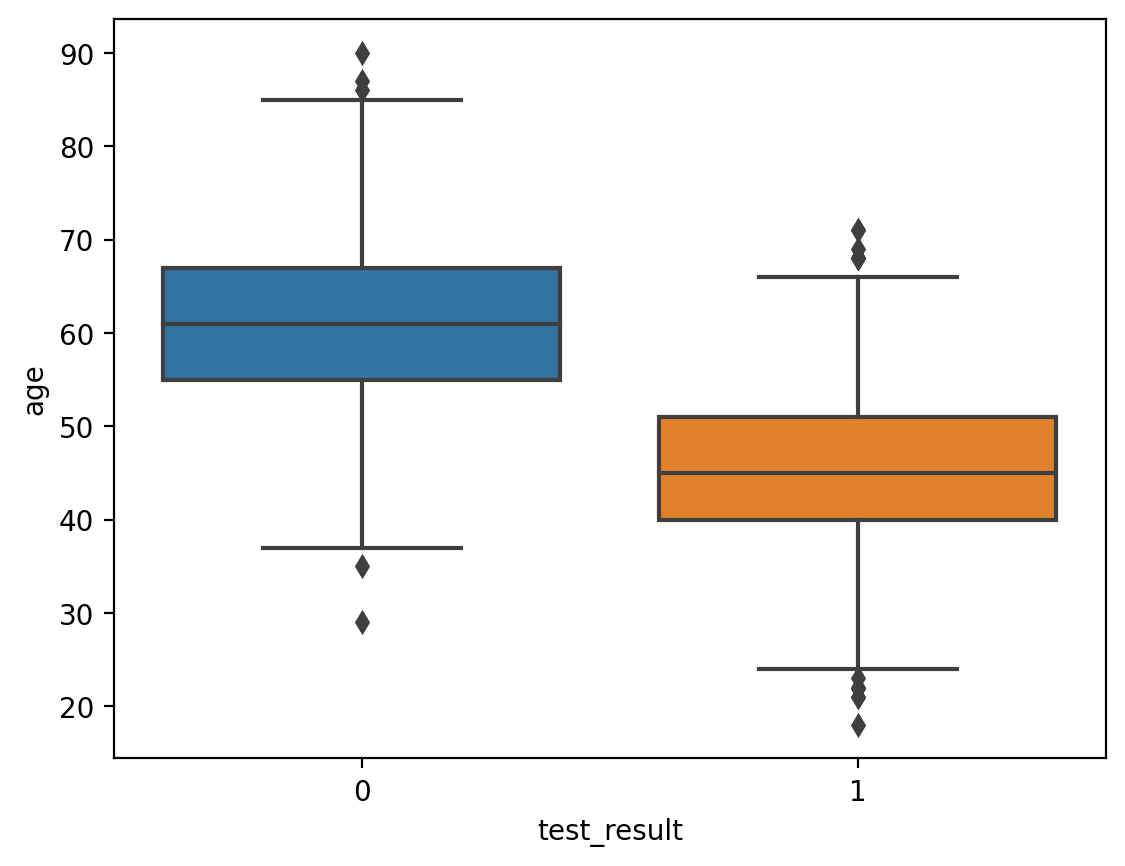

In [11]:
plt.figure(dpi=200)
sns.boxplot(data=df, x="test_result", y="age");

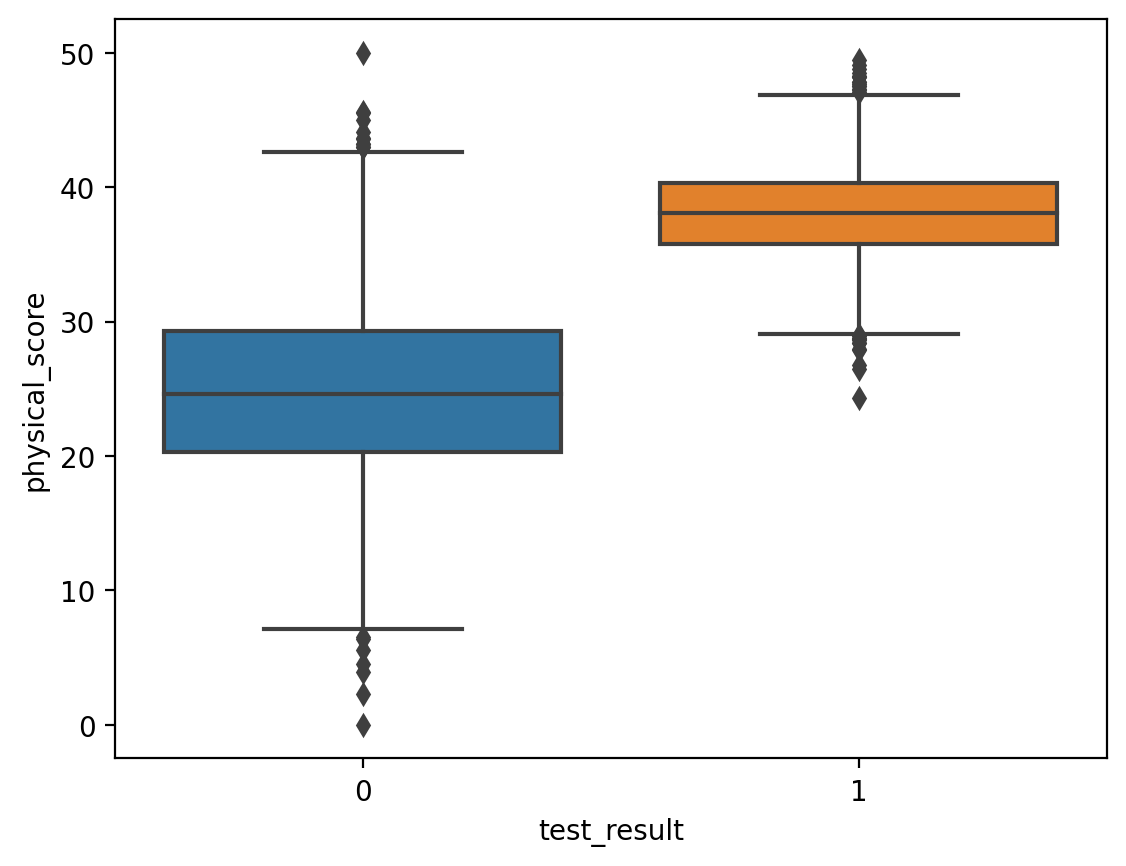

In [12]:
plt.figure(dpi=200)
sns.boxplot(data=df, x="test_result", y="physical_score");

<Axes: xlabel='age', ylabel='physical_score'>

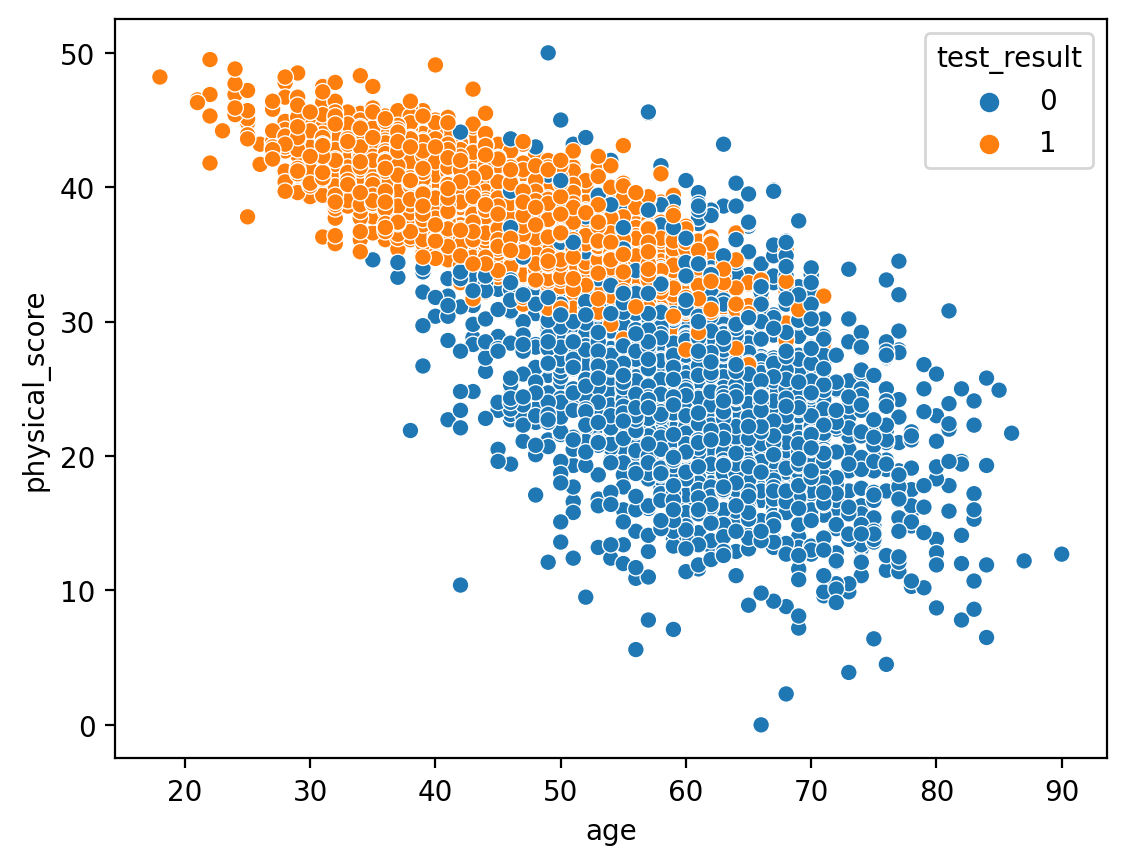

In [15]:
plt.figure(dpi=200)
sns.scatterplot(data=df, x="age", y="physical_score", hue="test_result")

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


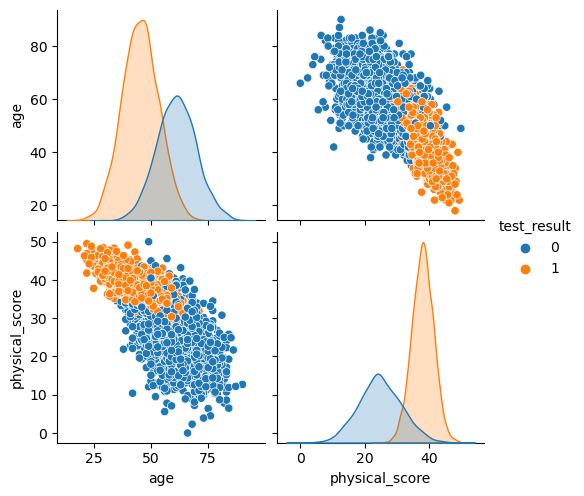

In [16]:
sns.pairplot(df, hue="test_result")

<Axes: >

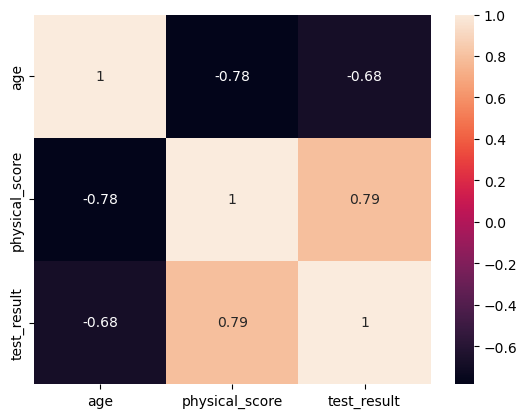

In [17]:
sns.heatmap(df.corr(), annot=True)

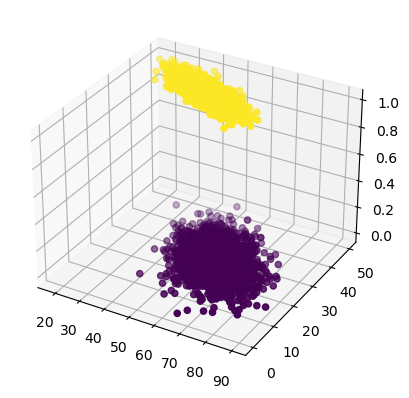

In [72]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["age"], df["physical_score"], df["test_result"], c=df["test_result"])

In [18]:
# Creating Logistic Regression Model

In [19]:
X = df.drop("test_result", axis=1)
y = df["test_result"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [28]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [29]:
y_pred = log_model.predict(scaled_X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [31]:
accuracy_score(y_test, y_pred)

0.93

In [36]:
matrix = confusion_matrix(y_test, y_pred)

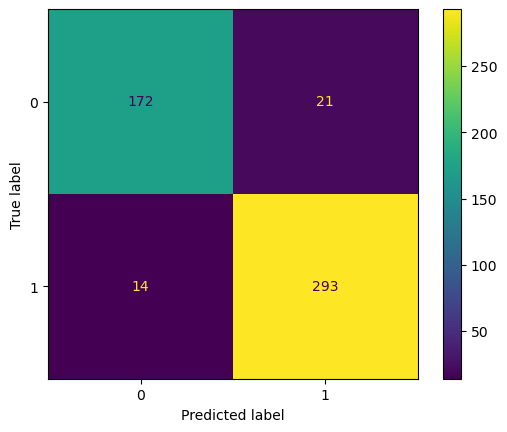

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot();

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [43]:
from sklearn.metrics import precision_score, recall_score

In [44]:
precision_score(y_test, y_pred)

0.9331210191082803

In [45]:
recall_score(y_test, y_pred)

0.9543973941368078

In [50]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

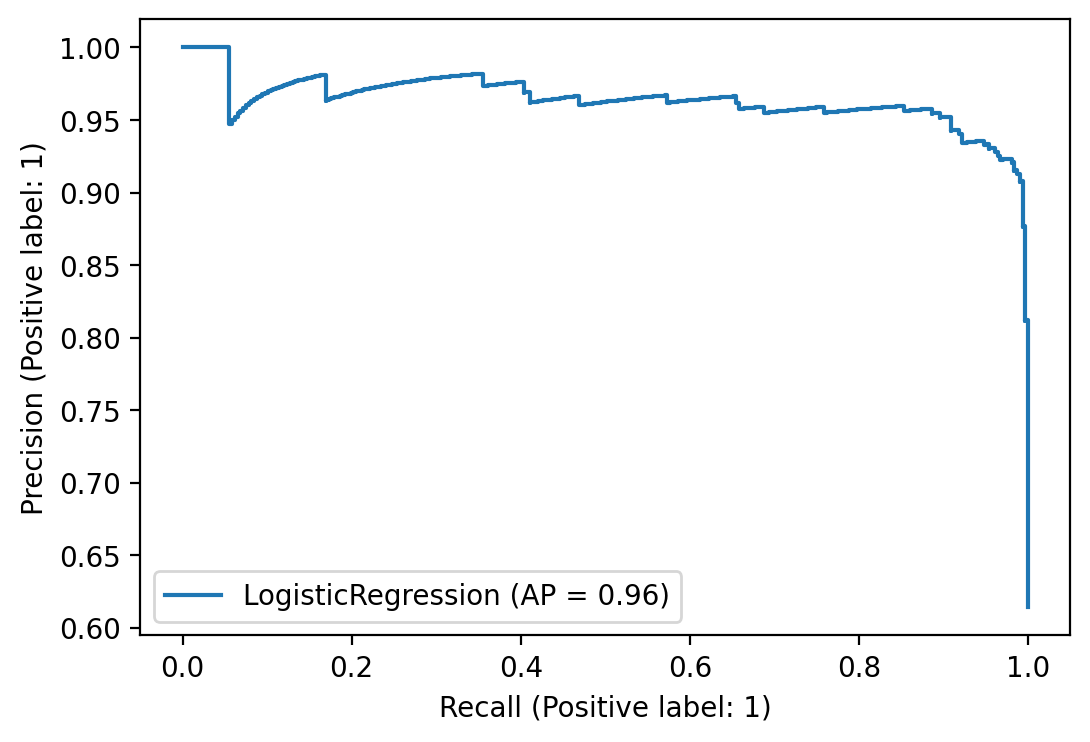

In [60]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

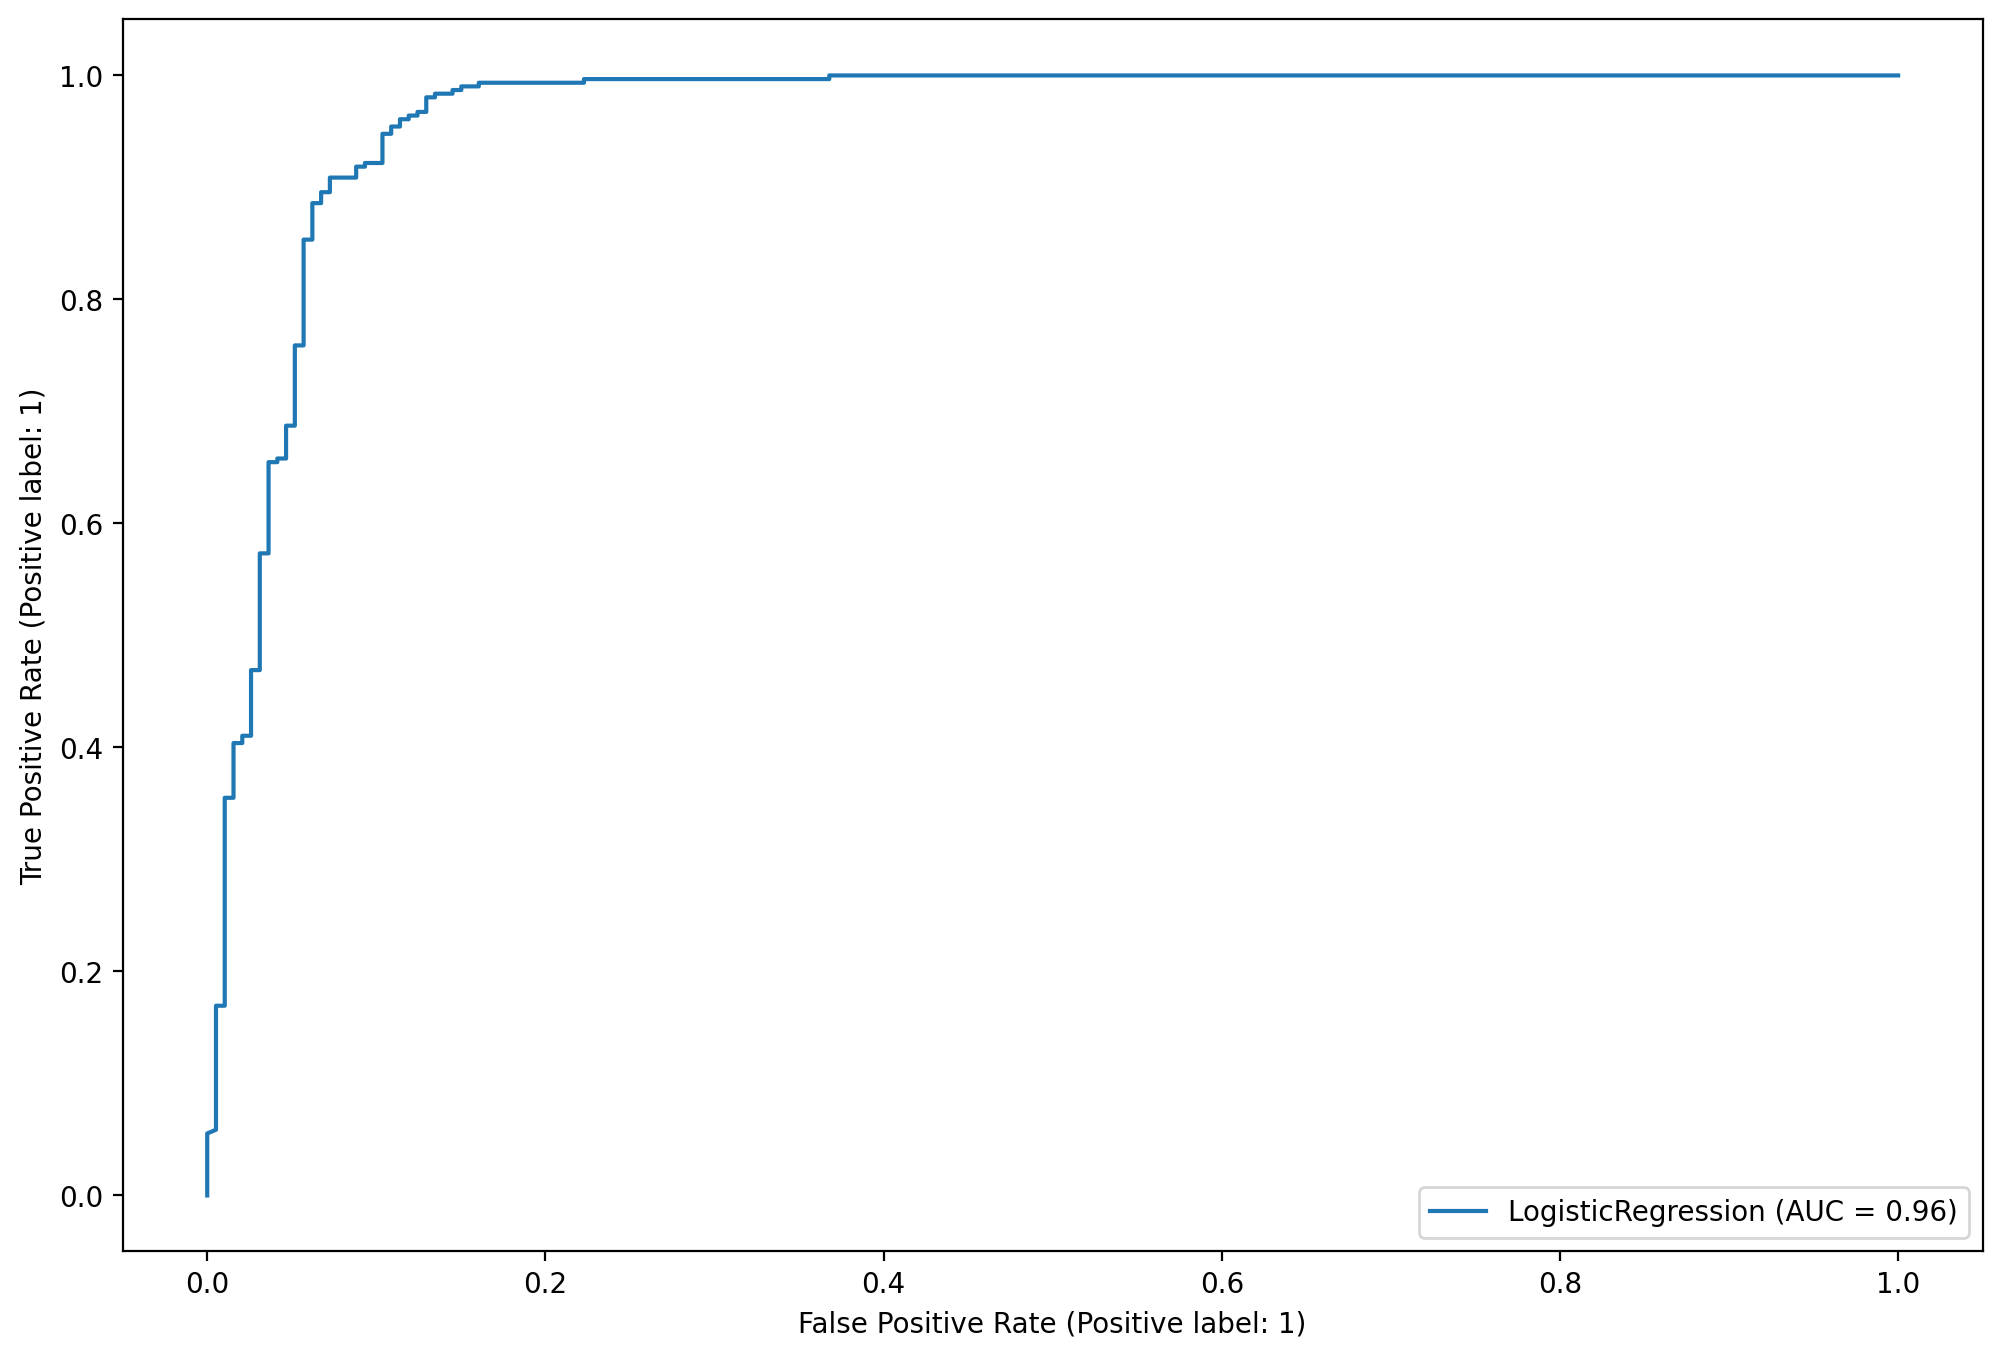

In [56]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

In [71]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [70]:
y_test[0]

1